#### SVD didnt work, not enough signal, too many dimensions

- reduce the dimensions

- incease the signal

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
import sklearn.metrics as sk

import pandas as pd
from collections import Counter
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [39]:
modern = pd.read_pickle('data/5color_modern_no_name_hardmode.pkl')
Counter(modern.colors)

Counter({u'Black': 1576,
         u'Blue': 1573,
         u'Green': 1566,
         u'Red': 1575,
         u'White': 1584})

In [40]:
modern['bincolor'] = pd.Categorical.from_array(modern.colors).codes

vectorizer = CountVectorizer()

y = modern.bincolor

X = vectorizer.fit_transform(modern.text)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print "There are {:,} words in the vocabulary.".format(len(vectorizer.vocabulary_))

There are 1,161 words in the vocabulary.


In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=2, multi_class='ovr', solver='liblinear')

acc = cross_val_score(clf, X_train, y_train,
                       cv=10, scoring='accuracy') 

print "Accuracy: %s" % acc.mean().round(3)

Accuracy: 0.702


In [61]:
n=1200
num_feat = []
acc_feat = []

for i in xrange(n/10 -1):
    vectorizer = CountVectorizer(max_features=n)

    X = vectorizer.fit_transform(modern.text)
    
    num_feat += [len(vectorizer.vocabulary_)]

    print "There are {:,} words in the vocabulary.".format(len(vectorizer.vocabulary_))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    clf = LogisticRegression(C=2, multi_class='ovr', solver='liblinear')

    acc = cross_val_score(clf, X_train, y_train,
                           cv=7, scoring='accuracy') 
    
    acc_feat += [acc.mean()]

    print "Accuracy: %s" % acc.mean().round(3)
    
    n -= 10
    
    

There are 1,161 words in the vocabulary.
Accuracy: 0.699
There are 1,161 words in the vocabulary.
Accuracy: 0.699
There are 1,161 words in the vocabulary.
Accuracy: 0.699
There are 1,161 words in the vocabulary.
Accuracy: 0.699
There are 1,160 words in the vocabulary.
Accuracy: 0.699
There are 1,150 words in the vocabulary.
Accuracy: 0.699
There are 1,140 words in the vocabulary.
Accuracy: 0.699
There are 1,130 words in the vocabulary.
Accuracy: 0.699
There are 1,120 words in the vocabulary.
Accuracy: 0.698
There are 1,110 words in the vocabulary.
Accuracy: 0.698
There are 1,100 words in the vocabulary.
Accuracy: 0.698
There are 1,090 words in the vocabulary.
Accuracy: 0.698
There are 1,080 words in the vocabulary.
Accuracy: 0.699
There are 1,070 words in the vocabulary.
Accuracy: 0.698
There are 1,060 words in the vocabulary.
Accuracy: 0.698
There are 1,050 words in the vocabulary.
Accuracy: 0.699
There are 1,040 words in the vocabulary.
Accuracy: 0.698
There are 1,030 words in the vo

In [65]:
num_feat

[1161,
 1161,
 1161,
 1161,
 1160,
 1150,
 1140,
 1130,
 1120,
 1110,
 1100,
 1090,
 1080,
 1070,
 1060,
 1050,
 1040,
 1030,
 1020,
 1010,
 1000,
 990,
 980,
 970,
 960,
 950,
 940,
 930,
 920,
 910,
 900,
 890,
 880,
 870,
 860,
 850,
 840,
 830,
 820,
 810,
 800,
 790,
 780,
 770,
 760,
 750,
 740,
 730,
 720,
 710,
 700,
 690,
 680,
 670,
 660,
 650,
 640,
 630,
 620,
 610,
 600,
 590,
 580,
 570,
 560,
 550,
 540,
 530,
 520,
 510,
 500,
 490,
 480,
 470,
 460,
 450,
 440,
 430,
 420,
 410,
 400,
 390,
 380,
 370,
 360,
 350,
 340,
 330,
 320,
 310,
 300,
 290,
 280,
 270,
 260,
 250,
 240,
 230,
 220,
 210,
 200,
 190,
 180,
 170,
 160,
 150,
 140,
 130,
 120,
 110,
 100,
 90,
 80,
 70,
 60,
 50,
 40,
 30,
 20]

In [66]:
acc_feat #= [i.mean() for i in acc_feat]

[0.69889547998747514,
 0.69889547998747514,
 0.69889547998747514,
 0.69889547998747514,
 0.69889547998747514,
 0.69889547998747514,
 0.69906474295723464,
 0.6988948781067722,
 0.69838749172196635,
 0.69838709062657478,
 0.69821802891905149,
 0.69821802891905149,
 0.69872601670932888,
 0.69838729093665464,
 0.69821822922913135,
 0.69855655295425811,
 0.69838749124673483,
 0.69872561466178118,
 0.69923340357276087,
 0.69838809503514465,
 0.69821923363770144,
 0.69855715674266794,
 0.698726820807819,
 0.69872621845019123,
 0.69838809503514465,
 0.6982188325423101,
 0.69906474343755398,
 0.69906514453294555,
 0.69838809503514465,
 0.69855775910029572,
 0.69855755879021586,
 0.69838849708269257,
 0.69771104553734398,
 0.69737151661833607,
 0.69787990502708031,
 0.69754158320966086,
 0.69788010772009879,
 0.69838849517498558,
 0.69804916704468345,
 0.69889708580491128,
 0.69889728754237901,
 0.6990665505121384,
 0.69906735317984625,
 0.6985577581481397,
 0.69787970424176871,
 0.6987264178047

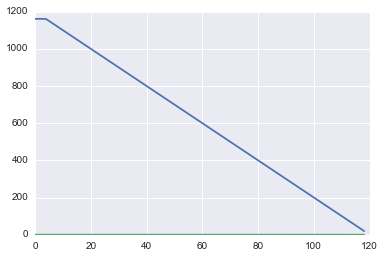

In [67]:
# seaborn.set_style("darkgrid")
plt.plot(zip(num_feat, acc_feat))
plt.show()